## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы (например,
Xboxили PlayStation). Вам нужно выявить определяющие успешность игры
закономерности. Это позволит сделать ставку на потенциально популярный продукт и
спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й
— по данным 2026 года.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

## Обзор данных

In [2]:
data = pd.read_csv('games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Проверка критичности пропущенных значений
data[data['Name'].isna()] 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [5]:
data[data['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
data['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [7]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [8]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<AxesSubplot:>

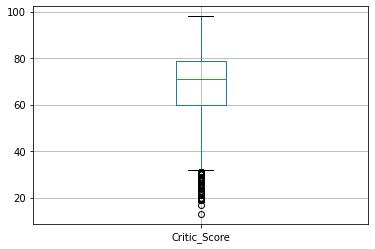

In [9]:
data.boxplot(column=['Critic_Score']) 

In [10]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
data[data['User_Score']=='tbd']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [12]:
data.duplicated().sum()

0

### Вывод
В данных есть пропуски, пару записей без имен являются неинформативными для дальнейшей работы. Необходимо также привести некоторые поля к нужному типу. Дубликатов не обнаружено. 


## Предобработка данных

In [13]:
data.columns = data.columns.str.lower()
data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
#Удаление пропусков
data = data.dropna(subset=['name','genre','year_of_release'])
#Заполнять пропуски в оценках и рейтинг не является необходимым поскольку такие вещи нельзя заполнить медианами или средним
#При исследовательском анализе данных и статистике можно просто не учитывать эти пропуски
#Приводим к нужным типам
data['year_of_release'] = data['year_of_release'].astype('int')
data.drop(data[data['user_score']=='tbd'].index, inplace=True)
data['user_score'] = data['user_score'].astype('float')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14068 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14068 non-null  object 
 1   platform         14068 non-null  object 
 2   year_of_release  14068 non-null  int32  
 3   genre            14068 non-null  object 
 4   na_sales         14068 non-null  float64
 5   eu_sales         14068 non-null  float64
 6   jp_sales         14068 non-null  float64
 7   other_sales      14068 non-null  float64
 8   critic_score     6927 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           7442 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.2+ MB


In [15]:
data['total'] = data['eu_sales']+data['jp_sales']+data['other_sales']+data['na_sales']

In [16]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


### Вывод 
Произвел предобработку данных для проведения статистического и исследовательского анализа данных. К пропускам могли привести отсутствие оценок для свежей игры(tbd) или отсутвие валидации при вводе данных. 

## Исследовательский анализ данных

#### Находим распределение игр по годам. Определяю актуальный период для исследования

In [17]:
data.groupby('year_of_release').count()['name']
#Имеет смысл брать данные с 1995 года, поскольку до этого времени игры не получали оценок, а продажи были не высокие
#Больше всего игр вышло в 2008, верните мне мой 2008 :)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     288
1998     379
1999     330
2000     307
2001     400
2002     637
2003     680
2004     655
2005     818
2006     882
2007    1005
2008    1101
2009    1021
2010     924
2011     919
2012     629
2013     529
2014     560
2015     568
2016     468
Name: name, dtype: int64

In [18]:
len(data['name'].unique())

10092

#### ● Исследую, как менялись продажи по платформам. Необходимо выделить платформы с наибольшими суммарными продажами и построить распределение по годам. Выявить за  какой характерный срок появляются новые и исчезают старые платформы?

In [19]:
good_data = data[data['year_of_release']>=1995]
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13582 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             13582 non-null  object 
 1   platform         13582 non-null  object 
 2   year_of_release  13582 non-null  int32  
 3   genre            13582 non-null  object 
 4   na_sales         13582 non-null  float64
 5   eu_sales         13582 non-null  float64
 6   jp_sales         13582 non-null  float64
 7   other_sales      13582 non-null  float64
 8   critic_score     6923 non-null   float64
 9   user_score       7459 non-null   float64
 10  rating           7437 non-null   object 
 11  total            13582 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.3+ MB


In [20]:
#Выводим список платформ с самой большой суммой продаж 
good_data_gr = good_data.groupby('platform')['total'].sum()
display(good_data_gr.sort_values( ascending=False).head(10))

platform
PS2     1171.19
X360     948.74
PS3      921.09
Wii      791.91
PS       708.23
DS       655.34
PS4      314.00
PSP      273.11
GBA      263.70
3DS      253.24
Name: total, dtype: float64

In [21]:
#Строим распределение
good_data_prod = good_data.pivot_table(index='platform', values='total', columns='year_of_release', aggfunc='sum')
raspr = good_data_prod.merge(good_data_gr, on='platform', how='inner')
raspr = raspr.sort_values(by='total', ascending=False).fillna(0).astype('int').head(7) 
raspr = raspr.drop('total', 1)
raspr = raspr.T
display(raspr)

platform,PS2,X360,PS3,Wii,PS,DS,PS4
1995,0,0,0,0,35,0,0
1996,0,0,0,0,94,0,0
1997,0,0,0,0,136,0,0
1998,0,0,0,0,169,0,0
1999,0,0,0,0,142,0,0
2000,34,0,0,0,86,0,0
2001,159,0,0,0,34,0,0
2002,198,0,0,0,6,0,0
2003,180,0,0,0,2,0,0
2004,209,0,0,0,0,17,0


<AxesSubplot:>

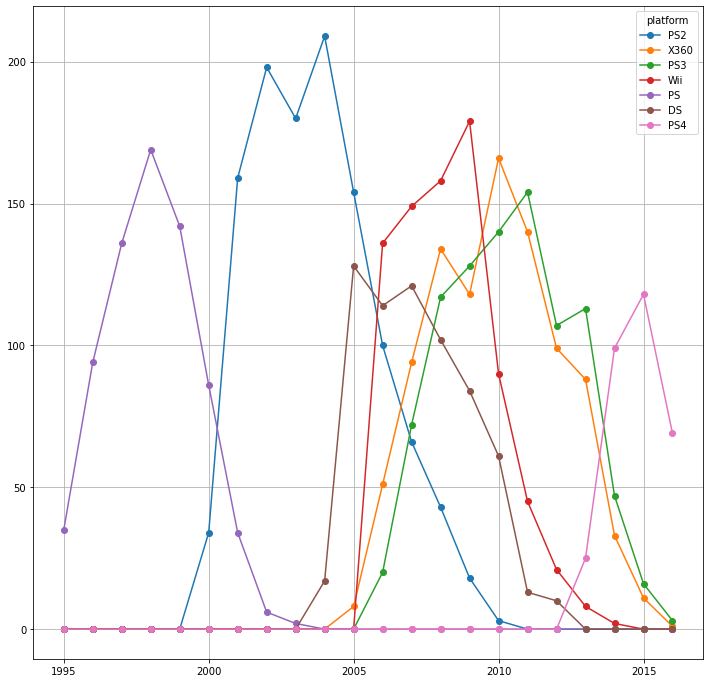

In [22]:
raspr.plot(figsize=(12,12),style='o-', grid=True)

Я специально совместил все 7 платформ на одном графике, чтобы показать что в каждом периоде была своя преобладающая платформа, популярность которой затем угасала, так и PS4 начинает отдавать свои позиции. В среднем платформа живет  8 лет. Однако для прогнозирования лучше взять период жизни последней популярной платформы, а это PS4, значит прогноз будет основываться на данных последних 4 лет.

#### ● Определяем актуальный период. Эти данные помогут построить прогноз на 2017 год.
#### ● Исследую какие платформы лидируют по продажам, растут или падают? Выявляю несколько потенциально прибыльных платформ

In [23]:
#Повторяем операции выше
new_data = data[data['year_of_release']>=2012]
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2754 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2754 non-null   object 
 1   platform         2754 non-null   object 
 2   year_of_release  2754 non-null   int32  
 3   genre            2754 non-null   object 
 4   na_sales         2754 non-null   float64
 5   eu_sales         2754 non-null   float64
 6   jp_sales         2754 non-null   float64
 7   other_sales      2754 non-null   float64
 8   critic_score     1300 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1495 non-null   object 
 11  total            2754 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 268.9+ KB


In [24]:
new_data_gr = new_data.groupby('platform')['total'].sum().sort_values( ascending=False).head(10)
display(new_data_gr)

platform
PS4     314.00
PS3     287.39
X360    235.00
3DS     192.71
XOne    158.77
WiiU     81.79
PC       62.56
PSV      48.87
Wii      31.95
DS       11.25
Name: total, dtype: float64

In [25]:
new_data_prod = new_data.pivot_table(index='platform', values='total', columns='year_of_release', aggfunc='sum')
raspr_n = new_data_prod.merge(new_data_gr, on='platform', how='inner')
raspr_n = raspr_n.sort_values(by='total', ascending=False).fillna(0).astype('int')
raspr_n = raspr_n.drop('total', 1)
boxframe = raspr_n
raspr_n = raspr_n.T
display(raspr_n)

platform,PS4,PS3,X360,3DS,XOne,WiiU,PC,PSV,Wii,DS
2012,0,107,99,51,0,17,23,16,21,10
2013,25,113,88,56,18,21,12,10,8,0
2014,99,47,33,43,54,22,13,11,2,0
2015,118,16,11,27,59,16,8,5,0,0
2016,69,3,1,15,25,4,5,4,0,0


<AxesSubplot:>

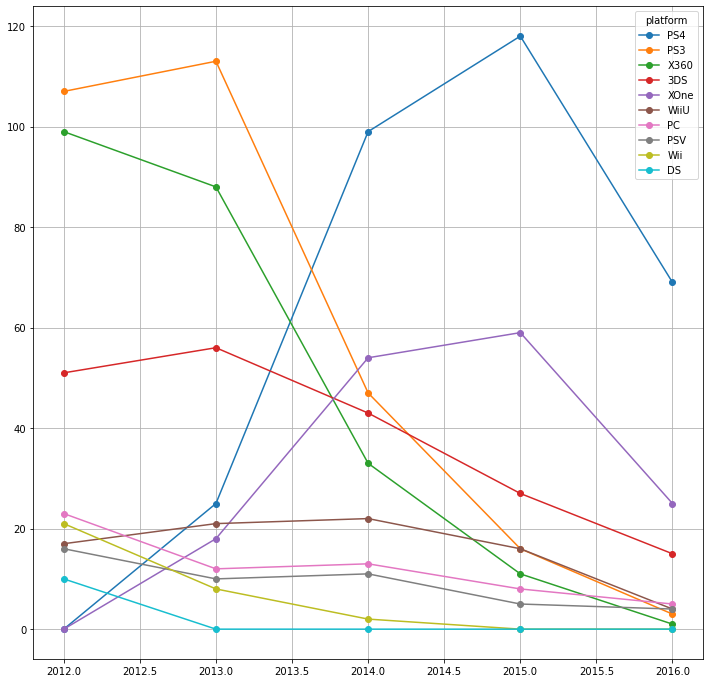

In [26]:
raspr_n.plot(figsize=(12,12),style='o-', grid=True)

На графиках видно, что не смотря на угасание PS4 и XOne - они являются самыми популярными платформами за последние два года, все остальные платформы падают в продажах, поскольку их вытесняет Sony и Майкрософт. Отдельно стоит заметить позицию пользователей на ПК, это самый стабильный слой игроков, про которых тоже не нужно забывать

<AxesSubplot:>

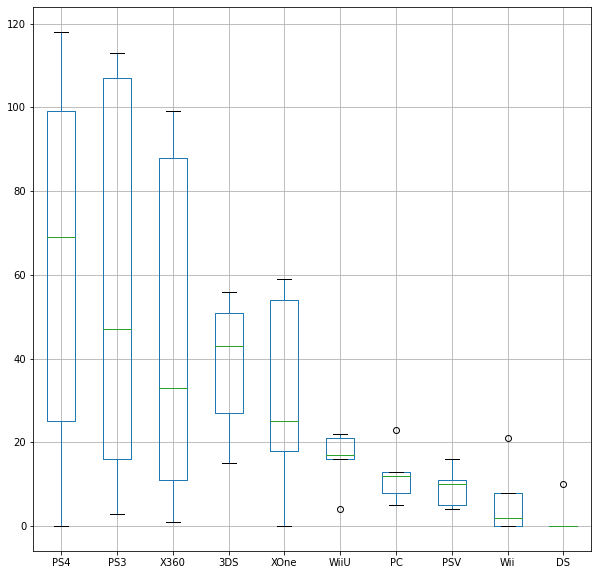

In [27]:
raspr_n.boxplot(figsize=(10,10))

На графике видно, что лидерство забирают такие платформы как PS3, X360 и Wii. Но эти приставки уже выходят из обихода и их заменили PS4 и XOne и 3Ds. А вот ПК ничем не заменить, пользователей немного, но они всегда есть. В целом платформу для размещения перспективной игры мы нашли это <b>PS4, Xone, 3DS и PC</b>

####   Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
####   Соотнесите выводы с продажами игр на других платформах

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total
index,1.000000,0.353356,-0.633460,-0.548830,-0.444081,-0.634171,-0.460341,-0.012843,-0.630754
year_of_release,0.353356,1.000000,-0.261760,-0.191355,-0.122830,-0.232177,-0.019983,0.150315,-0.234400
na_sales,-0.633460,-0.261760,1.000000,0.714988,0.530480,0.915292,0.414241,-0.022577,0.893807
eu_sales,-0.548830,-0.191355,0.714988,1.000000,0.519826,0.935136,0.346044,-0.050671,0.951656
jp_sales,-0.444081,-0.122830,0.530480,0.519826,1.000000,0.566734,0.322057,0.174512,0.592214
other_sales,-0.634171,-0.232177,0.915292,0.935136,0.566734,1.000000,0.408465,-0.037332,0.997798
critic_score,-0.460341,-0.019983,0.414241,0.346044,0.322057,0.408465,1.000000,0.557654,0.405895
user_score,-0.012843,0.150315,-0.022577,-0.050671,0.174512,-0.037332,0.557654,1.000000,-0.033625
total,-0.630754,-0.234400,0.893807,0.951656,0.592214,0.997798,0.405895,-0.033625,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total
index,1.000000,0.391594,-0.666504,-0.592884,-0.307975,-0.694395,-0.462259,0.068974,-0.692937
year_of_release,0.391594,1.000000,-0.262722,-0.194533,-0.144318,-0.263305,0.072812,0.117074,-0.257674
na_sales,-0.666504,-0.262722,1.000000,0.683604,0.400585,0.982840,0.381859,-0.094047,0.956913
eu_sales,-0.592884,-0.194533,0.683604,1.000000,0.381617,0.804073,0.373454,-0.075822,0.866036
jp_sales,-0.307975,-0.144318,0.400585,0.381617,1.000000,0.419054,0.199978,0.071915,0.430736
other_sales,-0.694395,-0.263305,0.982840,0.804073,0.419054,1.000000,0.404996,-0.095963,0.993180
critic_score,-0.462259,0.072812,0.381859,0.373454,0.199978,0.404996,1.000000,0.472462,0.410422
user_score,0.068974,0.117074,-0.094047,-0.075822,0.071915,-0.095963,0.472462,1.000000,-0.094003
total,-0.692937,-0.257674,0.956913,0.866036,0.430736,0.993180,0.410422,-0.094003,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total
index,1.000000,0.324992,-0.554003,-0.491631,-0.469084,-0.534207,-0.356955,-0.205103,-0.537921
year_of_release,0.324992,1.000000,-0.250604,-0.200701,-0.138941,-0.220562,-0.033121,0.080406,-0.207311
na_sales,-0.554003,-0.250604,1.000000,0.931039,0.729004,0.988297,0.316306,0.186534,0.939218
eu_sales,-0.491631,-0.200701,0.931039,1.000000,0.817348,0.973007,0.251750,0.140054,0.970197
jp_sales,-0.469084,-0.138941,0.729004,0.817348,1.000000,0.772936,0.299320,0.231463,0.910436
other_sales,-0.534207,-0.220562,0.988297,0.973007,0.772936,1.000000,0.298015,0.171029,0.965366
critic_score,-0.356955,-0.033121,0.316306,0.251750,0.299320,0.298015,1.000000,0.722762,0.310553
user_score,-0.205103,0.080406,0.186534,0.140054,0.231463,0.171029,0.722762,1.000000,0.201813
total,-0.537921,-0.207311,0.939218,0.970197,0.910436,0.965366,0.310553,0.201813,1.000000


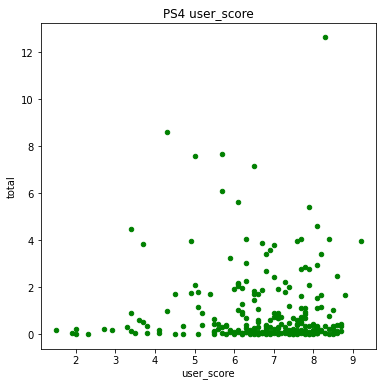

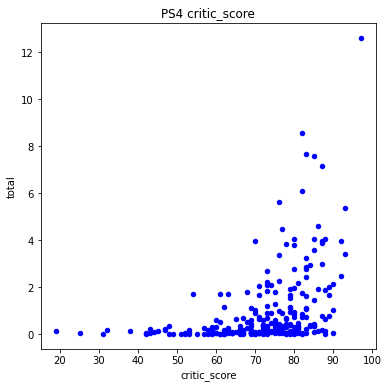

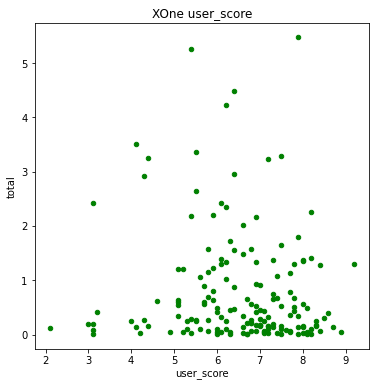

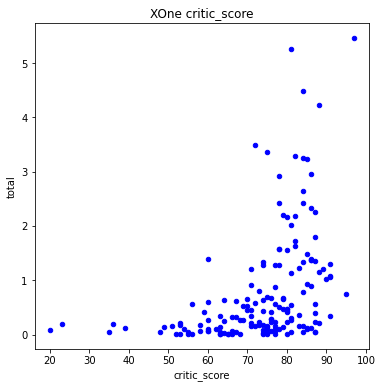

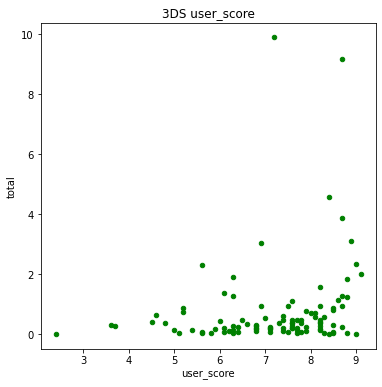

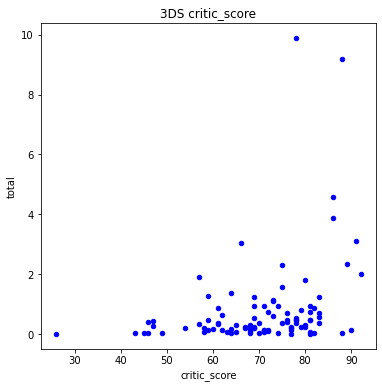

In [28]:
#Возьму PS4, Xone и 3DS
samp = ['PS4','XOne', '3DS']
for i in samp:
    pl_est = new_data.query('platform == @i')
    pl_est.drop(pl_est[pl_est['user_score']=='tbd'].index, inplace=True)
    pl_est = pl_est.dropna(subset=['user_score','critic_score']).reset_index()
    pl_est['user_score'] = pl_est['user_score'].astype('float') 
    #display(pl_est.info())
    #display(pl_est['user_score'].unique())
    pl_est.sort_values(by='user_score').plot(y='total', x='user_score', color='green', kind='scatter', figsize=(6,6), title=i+' user_score')
    display(pl_est.corr())
    pl_est.plot(y='total', x='critic_score', kind='scatter', figsize=(6,6), color='blue', title=i+' critic_score')

<b>Между оценками пользователей и продажами особой связи нет, а вот оценки критиков экспоненциально влияют на рост продаж, такая тенденция присуща всем платформам.</b>

#### ● Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [29]:
new_data.groupby('genre').count()['name']

genre
Action          983
Adventure       289
Fighting        106
Misc            173
Platform         78
Puzzle           21
Racing          112
Role-Playing    370
Shooter         228
Simulation       74
Sports          249
Strategy         71
Name: name, dtype: int64

In [30]:
new_data.groupby('genre').sum()['total'].sort_values(ascending=False)

genre
Action          437.04
Shooter         304.44
Role-Playing    192.80
Sports          179.93
Misc             82.00
Platform         60.19
Racing           53.25
Fighting         44.37
Simulation       34.56
Adventure        28.50
Strategy         13.34
Puzzle            4.69
Name: total, dtype: float64

<AxesSubplot:title={'center':'total'}, xlabel='genre'>

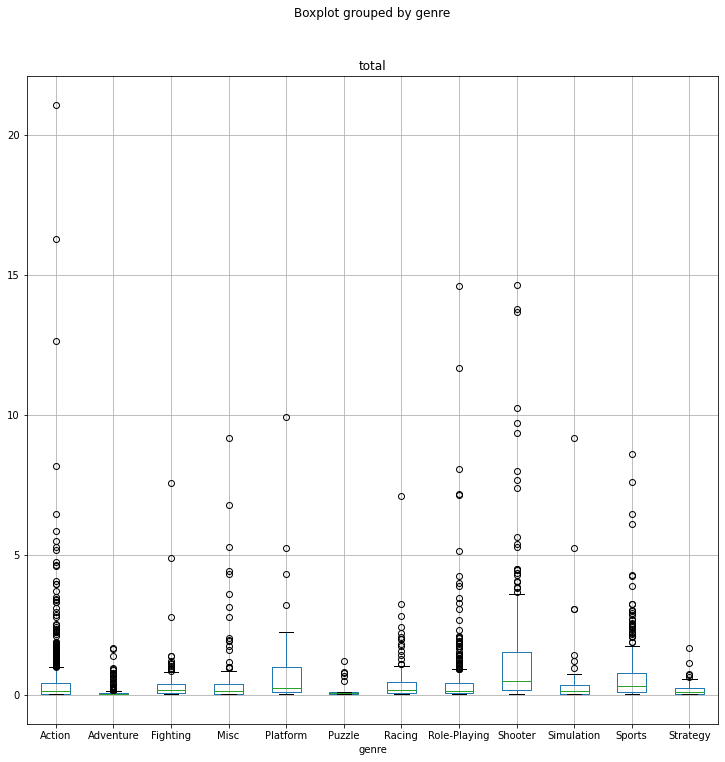

In [31]:
new_data.boxplot('total', by='genre', figsize=(12,12))

In [32]:
new_data.groupby('genre')['total'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,983.0,0.444598,1.191485,0.01,0.0400,0.130,0.4200,21.05
Adventure,289.0,0.098616,0.212240,0.01,0.0200,0.030,0.0700,1.66
Fighting,106.0,0.418585,0.921130,0.01,0.0625,0.150,0.3750,7.55
Misc,173.0,0.473988,1.132663,0.01,0.0300,0.130,0.3700,9.18
Platform,78.0,0.771667,1.412351,0.01,0.0825,0.250,0.9875,9.90
Puzzle,21.0,0.223333,0.340328,0.01,0.0200,0.060,0.1100,1.19
Racing,112.0,0.475446,0.898331,0.01,0.0500,0.165,0.4425,7.09
Role-Playing,370.0,0.521081,1.315937,0.01,0.0600,0.140,0.4075,14.60
Shooter,228.0,1.335263,2.275127,0.01,0.1500,0.475,1.5250,14.63


Экшены являются самым массовым жанром, но не самым прибыльным. А вот приключения несмотря на массовость приносят малый доход, также как стратегии и пазлы. Потенциал имеют шутеры, Platform и гонки или  спорт. Эти жанры имеют хорошую доходность в медиане и среднем.

### Шаг 4. Составьте портрет пользователя каждого региона
#### Определите для пользователя каждого региона (NA, EU, JP)
<br>● Самые популярные платформы (топ-5). Опишите различия в долях продаж.
<br>● Самые популярные жанры (топ-5). Поясните разницу.
<br>● Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [33]:
new_data['rating'] = new_data['rating'].fillna('Without Rating')
#Строим рейтинг по Японии
jp_stat = new_data.groupby('platform').sum()['jp_sales'].reset_index()
display(jp_stat.sort_values(by='jp_sales', ascending=False).head())
jp_stat_g = new_data.groupby('genre').sum()['jp_sales'].sort_values(ascending=False).reset_index()
display(jp_stat_g.sort_values(by='jp_sales', ascending=False).head())
jp_stat_r = new_data.groupby('rating').sum()['jp_sales'].reset_index()
display(jp_stat_r.sort_values(by='jp_sales', ascending=False).head())

<ipython-input-33-807d35c942eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['rating'] = new_data['rating'].fillna('Without Rating')


,platform,jp_sales
0,3DS,87.68
3,PS3,34.92
6,PSV,20.93
4,PS4,15.96
8,WiiU,13.01


,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.33
2,Misc,12.86
3,Simulation,10.35
4,Fighting,9.41


,rating,jp_sales
4,Without Rating,108.84
0,E,28.09
3,T,25.55
2,M,21.20
1,E10+,8.06


В Японии самые популярные платформы это 3DS и PS3. Наибольшую популярность в жанрах получают ролевые игры и экшены вероятно потому что японцы не милитаристкая нация и им шутеры не нравятся. Рейтинг категорий возглавляют игры без категорий(может быть из за массовости или потому что они доступнее), для всех и для подростков, а вот игры для раннего возраста в Японии не в чести.

In [34]:
#Строим рейтинг по Северной Америке
na_stat = new_data.groupby('platform').sum()['na_sales'].reset_index()
display(na_stat.sort_values(by='na_sales', ascending=False).head())
na_stat_g = new_data.groupby('genre').sum()['na_sales'].sort_values(ascending=False).reset_index()
display(na_stat_g.sort_values(by='na_sales', ascending=False).head())
na_stat_r = new_data.groupby('rating').sum()['na_sales'].reset_index()
display(na_stat_r.sort_values(by='na_sales', ascending=False).head())

,platform,na_sales
9,X360,139.16
4,PS4,108.62
3,PS3,103.10
10,XOne,92.77
0,3DS,54.65


,genre,na_sales
0,Action,176.39
1,Shooter,144.64
2,Sports,81.13
3,Role-Playing,64.00
4,Misc,36.90


,rating,na_sales
2,M,231.47
0,E,112.92
4,Without Rating,103.27
1,E10+,73.29
3,T,65.80


В Северной Америке самой популярной платформой стала X360, вероятно потому что майкрософт проводит хорошую маркетинговую компанию на своей территории.
Второе и третье место взяли PS3 и Wii. Американцам из жанров нравится экшены, шутеры и спорт. какая агресивная нация ;). А вот рейтинг рейтингов в сравнении с японцами слегка сместился, игры для всех отдали свою позицию играм для взрослых. Игры без рейтинга заняли третью строчку.

In [35]:
#Строим рейтинг по Европе
eu_stat = new_data.groupby('platform').sum()['eu_sales'].reset_index()
display(eu_stat.sort_values(by='eu_sales', ascending=False).head())
eu_stat_g = new_data.groupby('genre').sum()['eu_sales'].sort_values(ascending=False).reset_index()
display(eu_stat_g.sort_values(by='eu_sales', ascending=False).head())
eu_stat_r = new_data.groupby('rating').sum()['eu_sales'].reset_index()
display(eu_stat_r.sort_values(by='eu_sales', ascending=False).head())

,platform,eu_sales
4,PS4,141.09
3,PS3,106.26
9,X360,74.02
10,XOne,51.43
0,3DS,41.64


,genre,eu_sales
0,Action,157.51
1,Shooter,113.33
2,Sports,68.69
3,Role-Playing,48.53
4,Racing,27.19


,rating,eu_sales
2,M,193.94
0,E,110.95
4,Without Rating,91.24
3,T,52.82
1,E10+,52.48


Европа по показателям похожа на Северную Америку, однако любимой платформой у них является PS4 и PS3, а X360 занимает почетное третье место. По рейтингам и жанрам портрет схож с североамериканцем.

### Вывод
Выявлена корреляция между оценками критиков и продажами. Выявлены наиболее популярные платформы и перспективные. По каждому региону составлен портрет пользователя

### Шаг 5. Проверьте гипотезы

● 
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;<br>
● Средние пользовательские рейтинги жанров Action (англ. «действие»,
экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [36]:
# H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
# H1: Рейтинги не равны

alpha = .05
gip = new_data
gip.drop(gip[gip['user_score']=='tbd'].index, inplace=True)
gip = gip.dropna(subset=['user_score','critic_score']).reset_index()
gip['user_score'] = gip['user_score'].astype('float')


gip_pc = gip.query('platform == "PC"')
gip_pc = gip_pc['user_score']

gip_x = gip.query('platform == "XOne"')
gip_x = gip_x['user_score']

h0_results = st.ttest_ind(
    gip_pc, 
    gip_x)

print('p-значение:', h0_results.pvalue)

if (h0_results.pvalue < alpha ):
    print("Отвергаем нулевую гипотезу, рейтинги не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5991315923632393
Не получилось отвергнуть нулевую гипотезу


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
# H0: Средние пользовательские рейтинги жанров Action  и Sports одинаковые
# H1: Средние пользовательские рейтинги жанров Action  и Sports разные

alpha = .05

gip_a = gip.query('genre == "Action"')
gip_a = gip_a['user_score']

gip_s = gip.query('genre == "Sports"')
gip_s = gip_s['user_score']

h0_results = st.ttest_ind(
    gip_a, 
    gip_s)

print('p-значение:', h0_results.pvalue)

if (h0_results.pvalue < alpha and gip_a.mean()>gip_s.mean() ):
    print("Отвергаем нулевую гипотезу, рейтинги разные, у экшенов рейтинг выше")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.13633279873618e-16
Отвергаем нулевую гипотезу, рейтинги разные, у экшенов рейтинг выше


### Вывод
Для проверки гипотез было проведено сравнение средних двух выборок методом ttest_ind.<br>
В соответствии с проведенным исследованием выявлено, что: <br> 
<b>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</b><br>
<b>Средние пользовательские рейтинги жанров Action  и Sports разные, у Action средний пользовательский рейтинг выше</b>

## Общий вывод

В результате проведения исследования выявлено:
+ Наибольшую популяярность имеют платформы PS3 и X360, однако их популярность с каждым годом падает, имеет смысл обратить внимание на платформы нового поколения.
+ Для распространения игры в Азиатском регионе лучше вкладываться в ролевые игры и экшены на 3DS, которая будет доступна всем или вовсе без рейтинга
+ Для распространеия игры в Европе и Америке имеет смысл рассмотреть игры на Playstation и XBox соответственно, в жанрах экшен или шутер с рейтнгом для взрослых
+ Пользователи по всему миру на ПК и XBox360 одинаково оценивают игры
+ А вот экшены в среднем имеют более высокий рейтинг, чем игры про спорт
### Спасибо за внимание!